In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df_genre = pd.read_csv("C:/Users/micha/PycharmProjects/Docs/DA capstone project/da_project_spotify_data/genres_v2.csv", dtype={'song_name': str})
df_playlists = pd.read_csv("C:/Users/micha/PycharmProjects/Docs/DA capstone project/da_project_spotify_data/playlists.csv", )
# column_19 = df_genre.iloc[:, [19]]
# display(column_19)
df_genre.drop(columns=['Unnamed: 0'],inplace=True)
df_genre.drop(columns=['title'],inplace=True)
df_genre = df_genre.dropna()
# desc = df_genre.describe()
# print(desc)
# df_genre.to_csv("C:/Users/micha/PycharmProjects/Docs/DA capstone project/da_project_spotify_data/genres_v2_updated.csv", index=False)  # Set index=False to exclude row indices in the CSV file
display(df_genre)
# c = df_genre['genre'].value_counts()
# print(c)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,160.299,audio_features,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,Hiphop,Daddy's Girl
21521,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,154.272,audio_features,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,Hiphop,'94
21522,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,184.160,audio_features,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,Hiphop,Born 2 Live
21523,0.747,0.832,3,-5.737,0,0.1850,0.23300,0.000014,0.1300,0.7330,188.760,audio_features,2kpwzDrLK5KoIk1S5wftX7,spotify:track:2kpwzDrLK5KoIk1S5wftX7,https://api.spotify.com/v1/tracks/2kpwzDrLK5Ko...,https://api.spotify.com/v1/audio-analysis/2kpw...,182040,4,Hiphop,Can't Hold On


In [21]:
# display(df_playlists)
d = df_playlists['Genre'].value_counts()
print(d)

Genre
Emo                9
Trap Metal         7
RnB                7
Dark Trap          5
Hiphop             5
Rap                3
Pop                2
Underground Rap    1
Name: count, dtype: int64


In [3]:
# 1. Descriptive Statistics: What are the summary statistics of the dataset?\
# Summary statistics for quantitative variables using describe
print('Summary Statistics')
print(df_genre.describe())  

Summary Statistics
       danceability        energy           key      loudness          mode  \
count  21519.000000  21519.000000  21519.000000  21519.000000  21519.000000   
mean       0.674583      0.657252      5.144942     -7.039576      0.583020   
std        0.159427      0.175719      3.693472      2.906579      0.493071   
min        0.065100      0.000243      0.000000    -33.357000      0.000000   
25%        0.566000      0.535000      1.000000     -8.645500      0.000000   
50%        0.697000      0.660000      5.000000     -6.687000      1.000000   
75%        0.796000      0.792000      8.000000     -5.049500      1.000000   
max        0.988000      0.999000     11.000000      3.148000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  21519.000000  21519.000000      21519.000000  21519.000000   
mean       0.178072      0.167282          0.075957      0.195378   
std        0.140648      0.208450          0.220703      0.151

<Figure size 1600x1000 with 0 Axes>

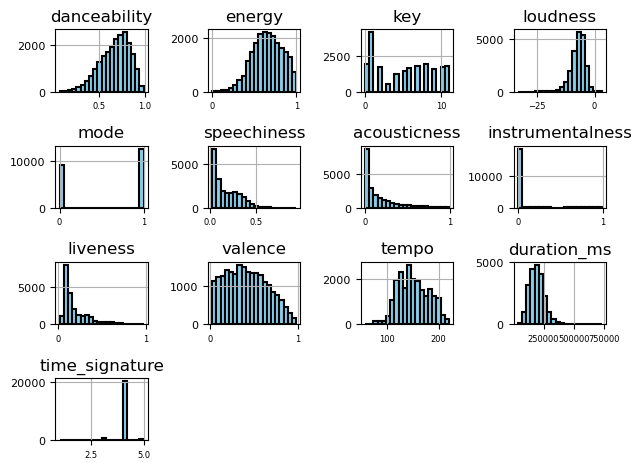

In [4]:
#2 Descriptive Question: What is the distribution of each variable?
# using histograms in the DataFrame to show distribution of each variable 
plt.figure(figsize=(16, 10))
df_genre.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.5, xlabelsize=6, ylabelsize=8)
plt.tight_layout()
plt.show()

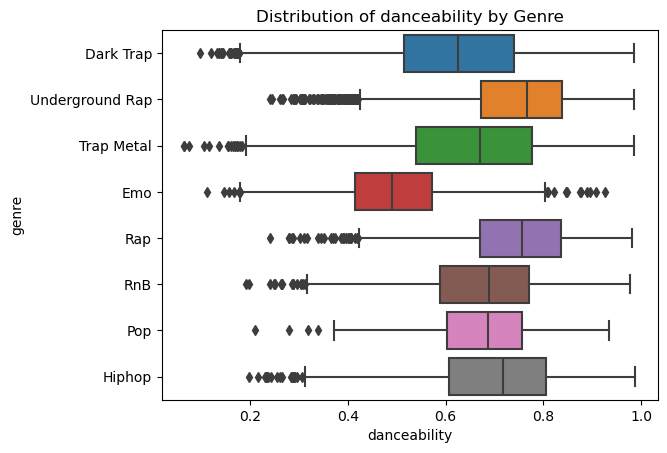

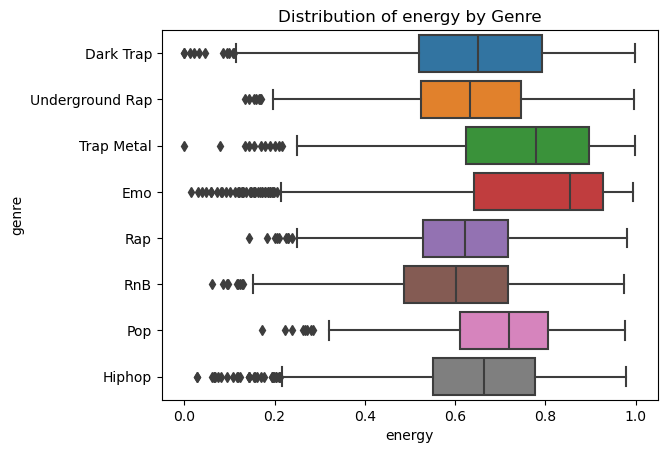

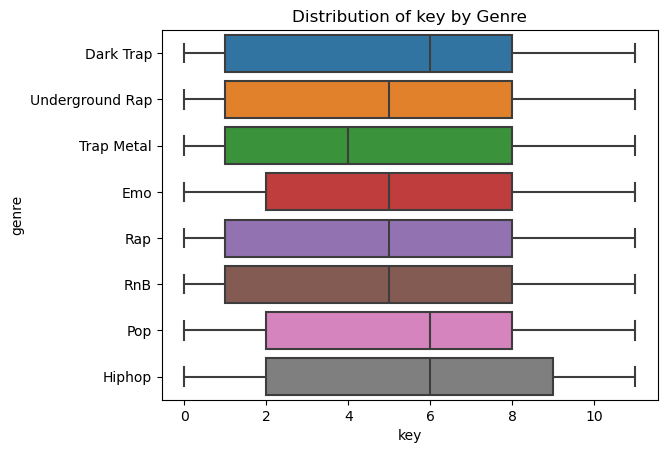

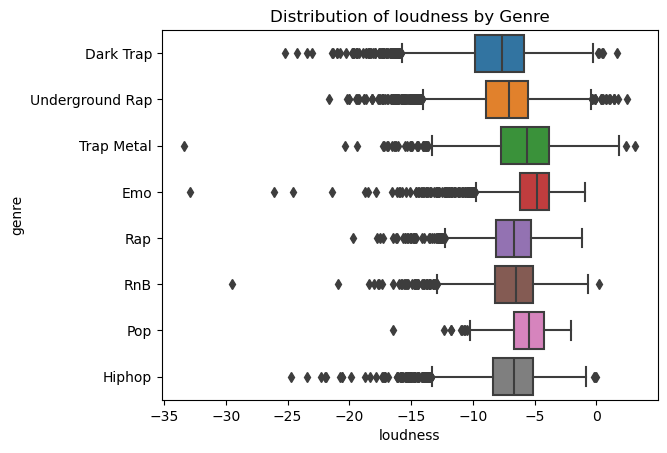

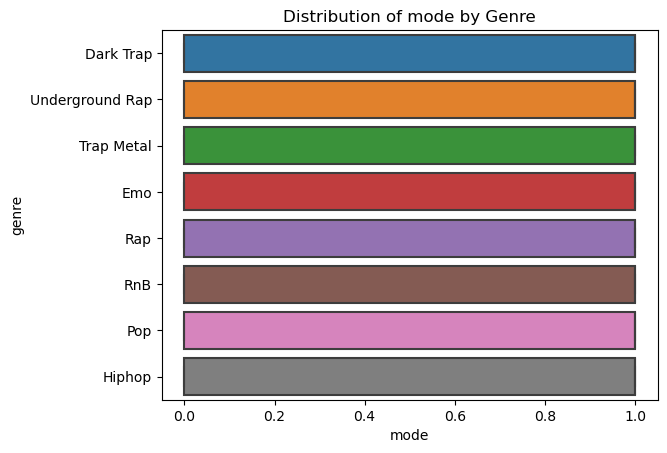

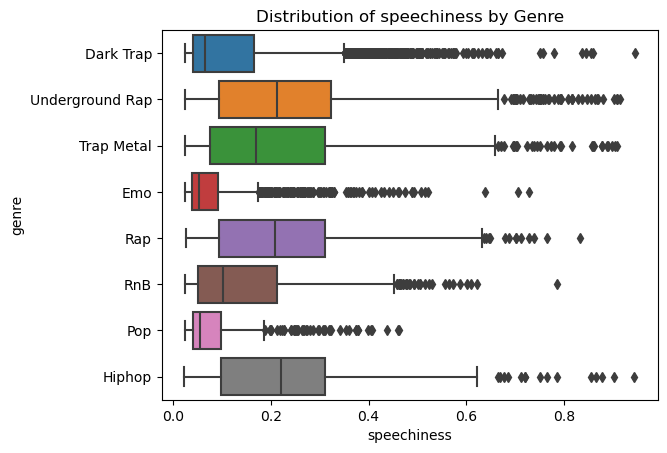

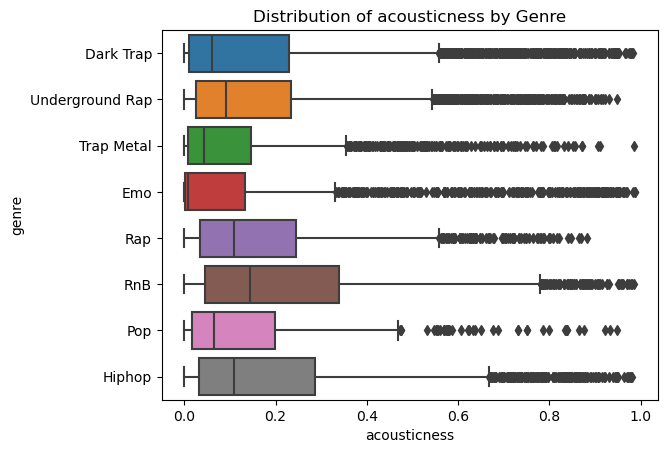

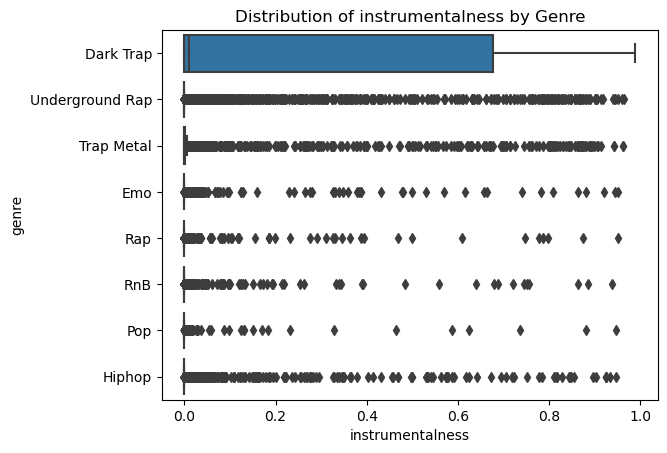

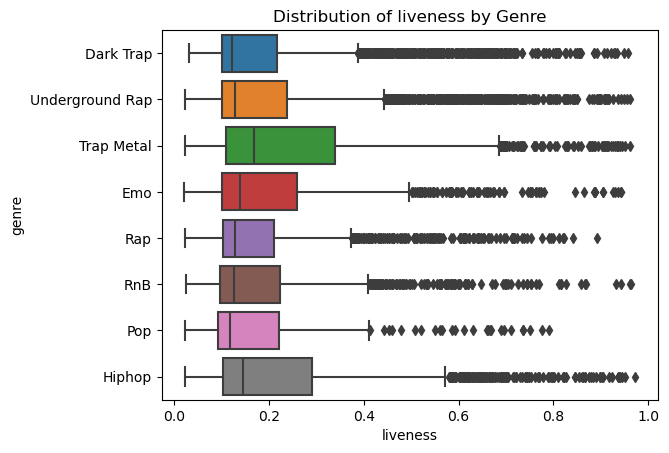

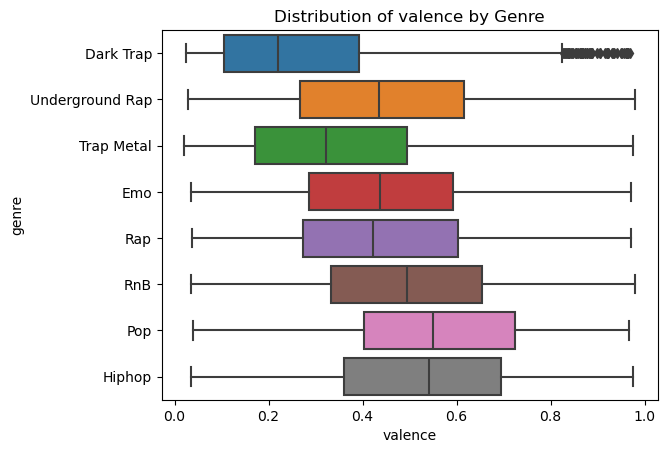

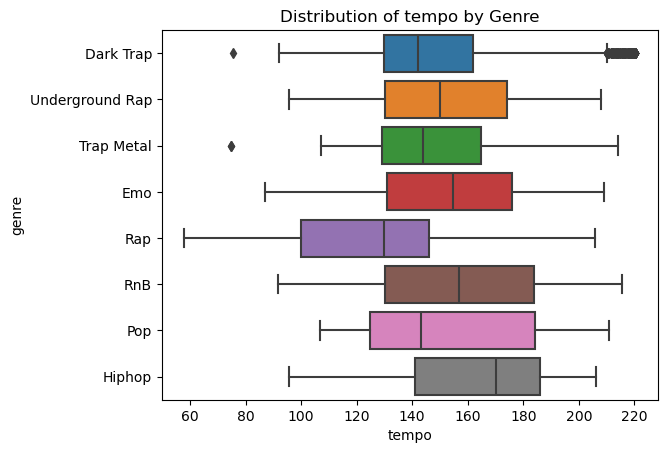

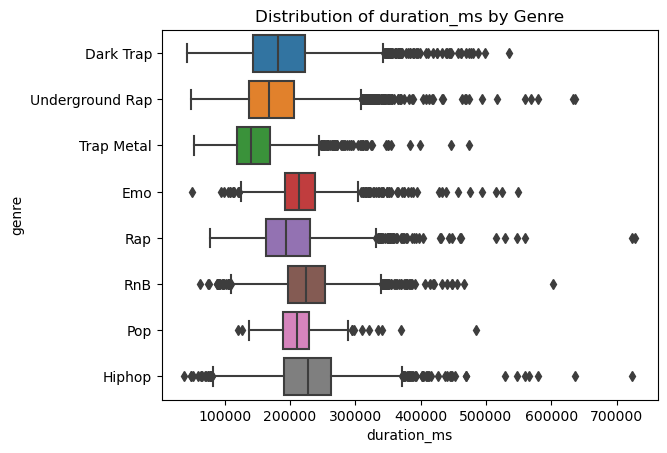

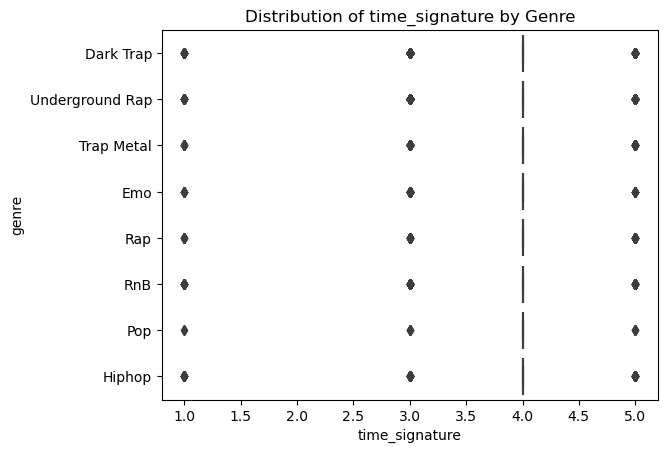

In [26]:
# distribution of column data against different genres
for var in quantitative_vars:
    sns.boxplot(x=var, y='genre', data=df_genre)
    plt.title(f'Distribution of {var} by Genre')
    plt.show()

In [5]:
# Covariance/Correlation
quantitative_vars = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                     'speechiness', 'acousticness', 'instrumentalness', 
                     'liveness', 'valence', 'tempo', 'duration_ms',	'time_signature']

# Compute the covariance matrix
covariance_matrix = df_genre[quantitative_vars].cov()
print("Covariance Matrix:")
print(covariance_matrix)

# Compute the correlation matrix
correlation_matrix = df_genre[quantitative_vars].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

Covariance Matrix:
                  danceability      energy          key     loudness  \
danceability          0.025417   -0.005757    -0.008375    -0.027777   
energy               -0.005757    0.030877     0.018420     0.357504   
key                  -0.008375    0.018420    13.641738     0.009744   
loudness             -0.027777    0.357504     0.009744     8.448204   
mode                  0.002711    0.001714    -0.416788     0.063010   
speechiness           0.004297    0.000752    -0.000705    -0.004955   
acousticness         -0.001495   -0.014269     0.024819    -0.184506   
instrumentalness     -0.007553   -0.000390     0.024799    -0.129929   
liveness             -0.003075    0.005978     0.006308     0.061653   
valence               0.011538    0.010075     0.047394     0.144963   
tempo                -0.375799    0.277555     0.645596     2.967604   
duration_ms       -1602.896901  439.181861  8929.507005  6311.887433   
time_signature        0.004430    0.002835   

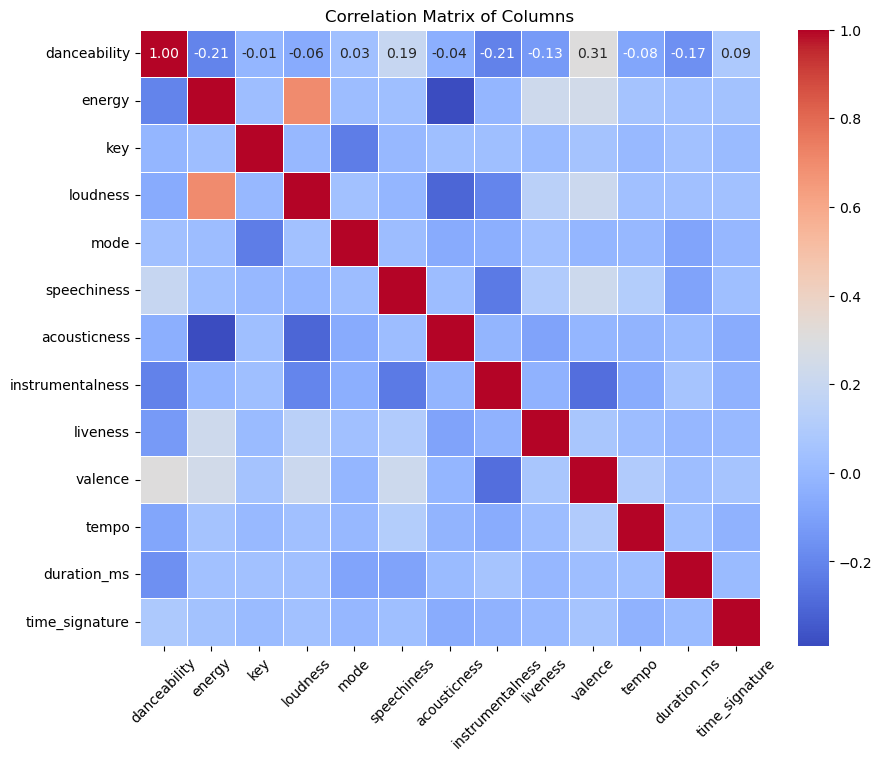


Variance Inflation Factor (VIF):
            Variable        VIF
0       danceability  22.489520
1             energy  28.609309
2                key   3.106300
3           loudness  12.098909
4               mode   2.533522
5        speechiness   2.997479
6       acousticness   1.952681
7   instrumentalness   1.389703
8           liveness   2.867444
9            valence   5.696674
10             tempo  25.687419
11       duration_ms  11.325894
12    time_signature  83.288090


In [8]:
# 3 Exploratory Question: Is there a relationship between variables in the dataset?
# using Variance Inflation Factor to detect multicollinearity in regression analysis.
#  Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated, which can cause issues 
# such as unstable estimates of the regression coefficients and inflated standard errors.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)
plt.title('Correlation Matrix of Columns')
plt.show()
numerical_df = df_genre[quantitative_vars]

# Optionally, calculate Variance Inflation Factor (VIF) to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = quantitative_vars
vif_data["VIF"] = [variance_inflation_factor(numerical_df.values, i) for i in range(len(quantitative_vars))]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

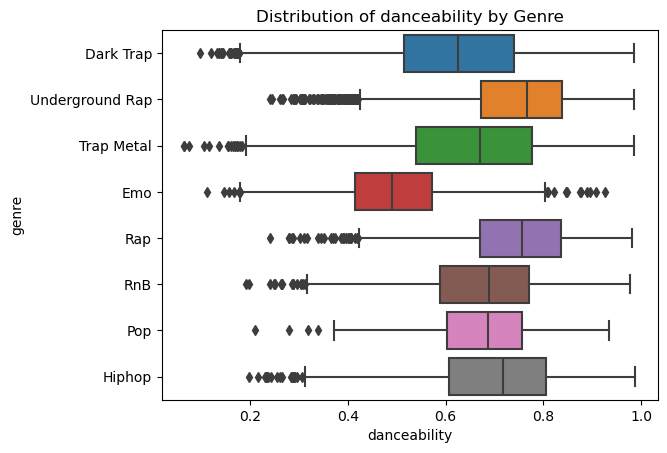

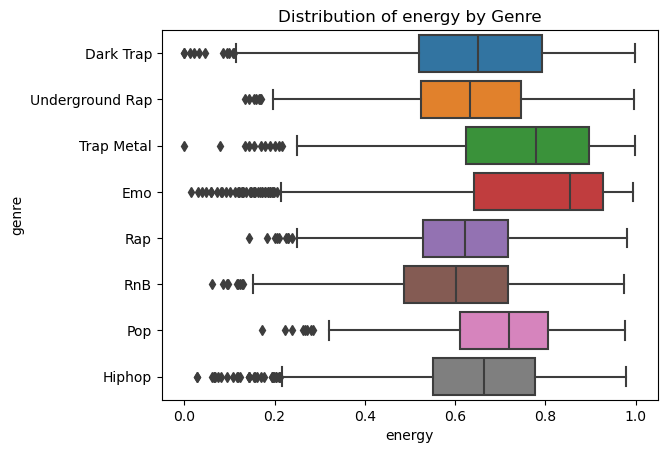

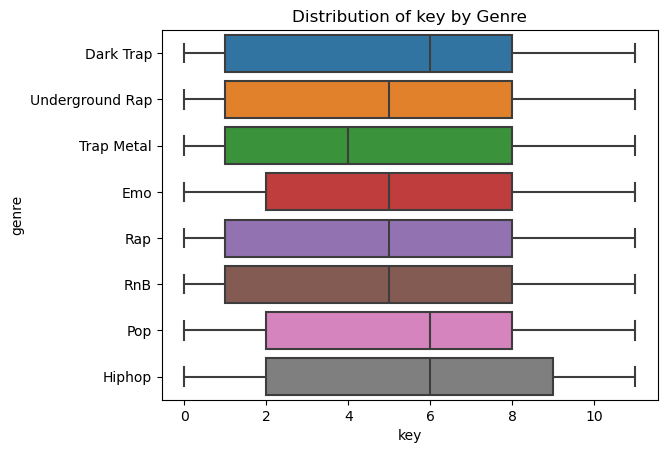

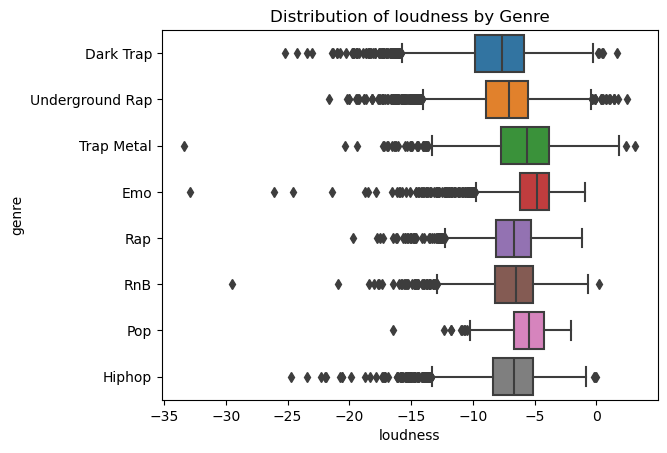

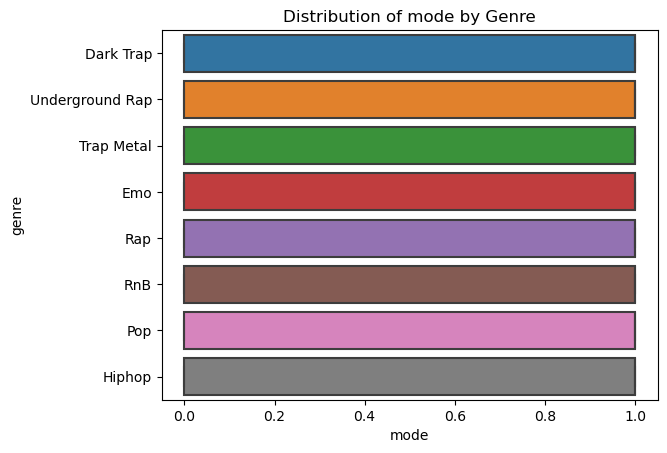

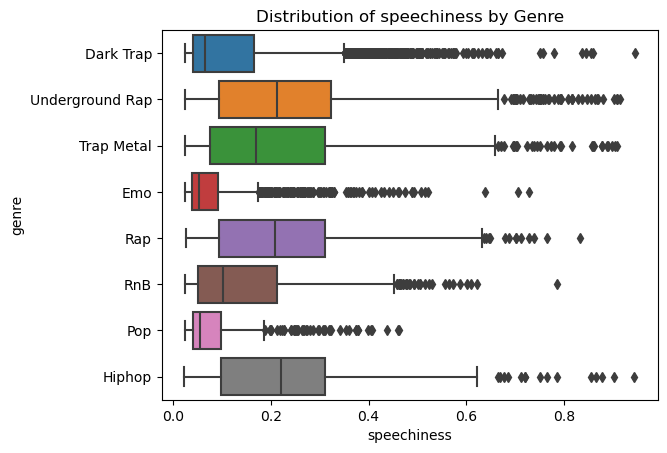

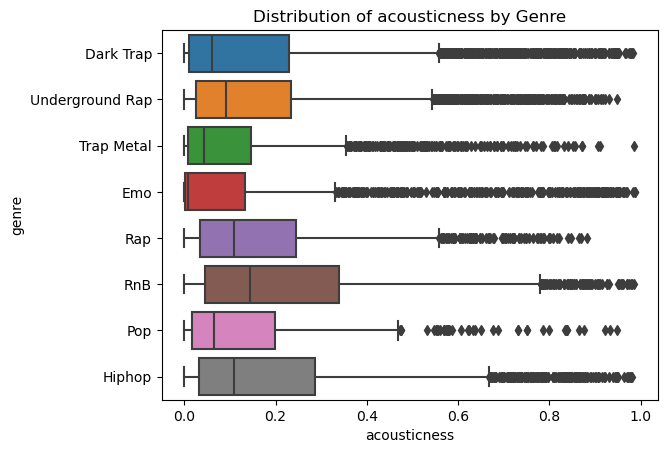

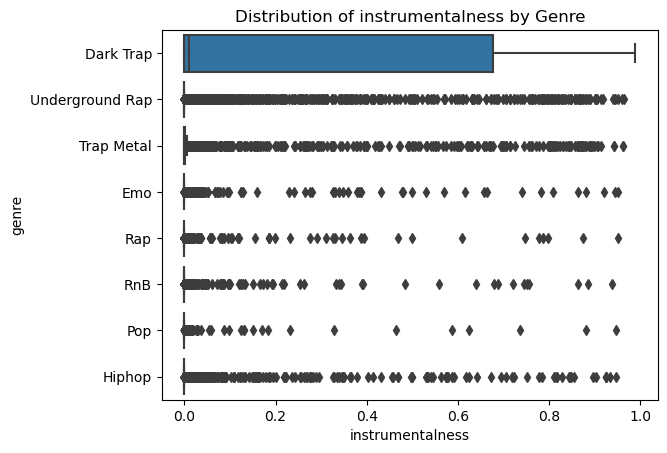

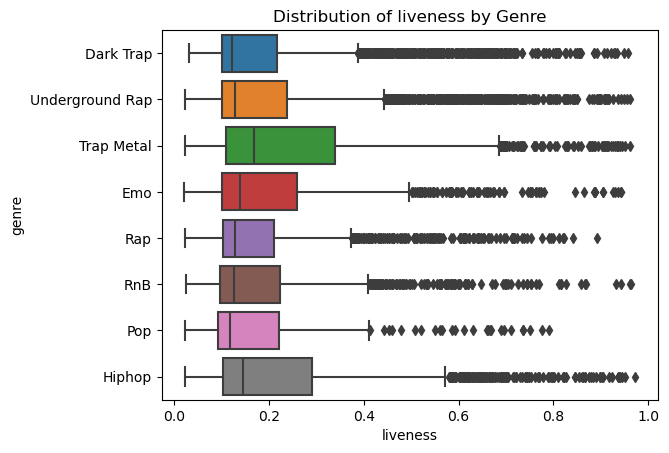

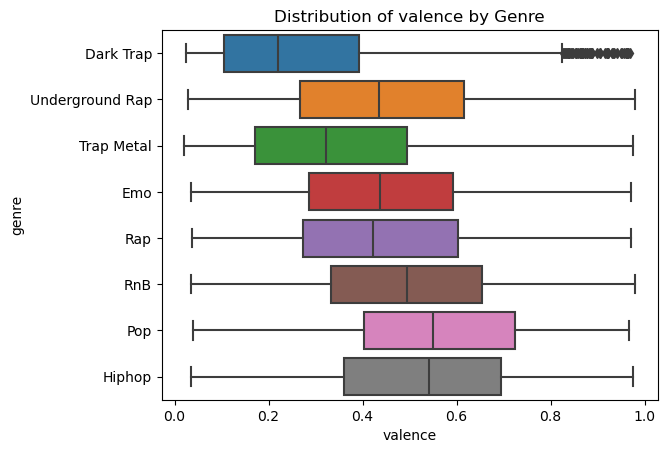

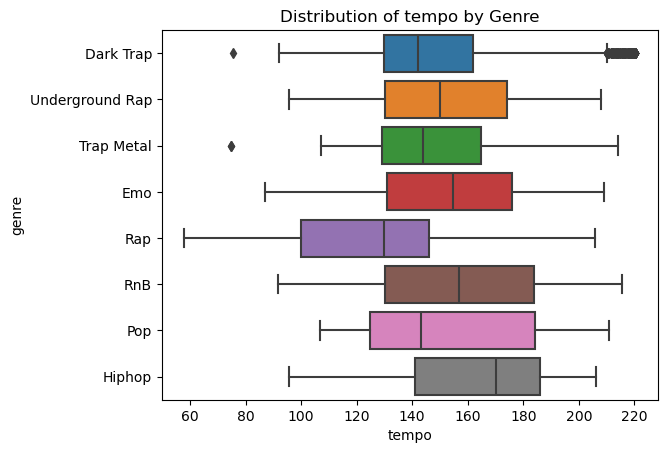

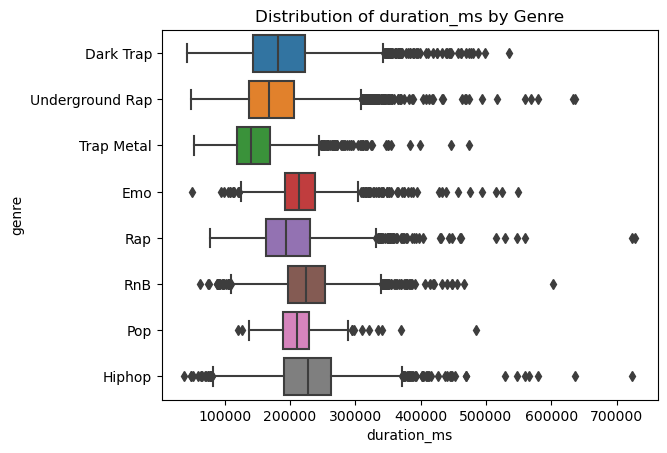

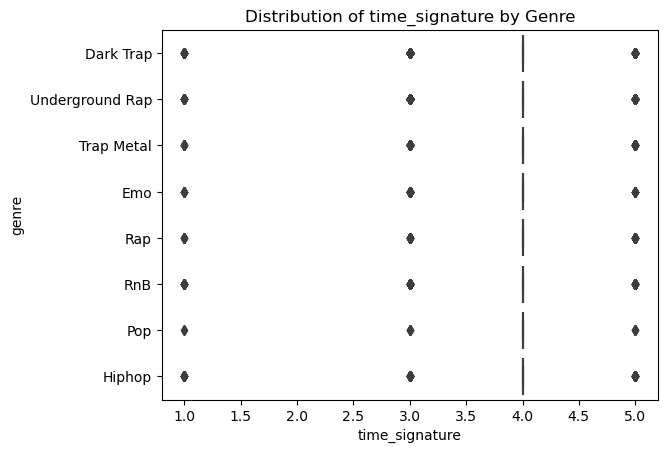

In [24]:
# Predictive Questions: performs a multiple linear regression analysis using the statsmodels library in Python.
# using predictive modeling use Linear regression to make predictions about the value of the dependent variable 
# based on the values of the independent variables
import statsmodels.api as sm

# Define independent and dependent variables
independent_vars = ['danceability', 'tempo', 'valence', 'acousticness']
dependent_var = 'energy'

# Add constant term
X = sm.add_constant(df_genre[independent_vars])
y = df_genre[dependent_var]

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     2392.
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:53:35   Log-Likelihood:                 10844.
No. Observations:               21519   AIC:                        -2.168e+04
Df Residuals:                   21514   BIC:                        -2.164e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8681      0.007    121.748   